In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#Updated csv file where missing values in 'Purpose' column got deleted.
uber_df = pd.read_csv("Uber_trips_2016.csv", low_memory=False)
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,SALARY
0,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,$10.32
1,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,$10.11
2,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,$136.96
3,1/6/16 17:15,1/6/16 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,$9.25
4,1/6/16 17:30,1/6/16 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting,$15.27
...,...,...,...,...,...,...,...,...
566,12/30/16 16:45,12/30/16 17:08,Business,Karchi,Karchi,4.6,Meeting,$9.89
567,12/30/16 23:06,12/30/16 23:10,Business,Karchi,Karchi,0.8,Customer Visit,$1.72
568,12/31/16 1:07,12/31/16 1:14,Business,Karchi,Karchi,0.7,Meeting,$1.51
569,12/31/16 21:32,12/31/16 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,$13.76


In [3]:
from datetime import datetime

In [4]:
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'], format = '%m/%d/%y %H:%M')
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'], format = '%m/%d/%y %H:%M')

uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,SALARY
0,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,$10.32
1,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,$10.11
2,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,$136.96
3,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,$9.25
4,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,$15.27
...,...,...,...,...,...,...,...,...
566,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karchi,Karchi,4.6,Meeting,$9.89
567,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karchi,Karchi,0.8,Customer Visit,$1.72
568,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,Karchi,0.7,Meeting,$1.51
569,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,$13.76


In [5]:
uber_df['MONTH'] = uber_df['START_DATE'].apply(lambda time: time.month)
uber_df['DAY_OF_THE_WEEK'] = uber_df['START_DATE'].apply(lambda time: time.dayofweek)

In [6]:
mmap = {1:'Jan', 2:'Feb',3:'Mar', 4:'Apr',5:'May',6:'June',7:'July', 8:'Aug', 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
uber_df['MONTH'] = uber_df['MONTH'].map(mmap)
uber_df['MONTH']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
566    Dec
567    Dec
568    Dec
569    Dec
570    Dec
Name: MONTH, Length: 571, dtype: object

In [7]:
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,SALARY,MONTH,DAY_OF_THE_WEEK
0,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,$10.32,Jan,5
1,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,$10.11,Jan,1
2,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,$136.96,Jan,2
3,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,$9.25,Jan,2
4,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,$15.27,Jan,2
...,...,...,...,...,...,...,...,...,...,...
566,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karchi,Karchi,4.6,Meeting,$9.89,Dec,4
567,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karchi,Karchi,0.8,Customer Visit,$1.72,Dec,4
568,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,Karchi,0.7,Meeting,$1.51,Dec,5
569,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,$13.76,Dec,5


In [8]:
#Calculating duration of each ride
uber_df['DURATION'] = uber_df['END_DATE'] - uber_df['START_DATE']
uber_df.dtypes

START_DATE          datetime64[ns]
END_DATE            datetime64[ns]
CATEGORY                    object
START                       object
STOP                        object
MILES                      float64
PURPOSE                     object
SALARY                      object
MONTH                       object
DAY_OF_THE_WEEK              int64
DURATION           timedelta64[ns]
dtype: object

In [9]:
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,SALARY,MONTH,DAY_OF_THE_WEEK,DURATION
0,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,$10.32,Jan,5,0 days 00:13:00
1,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,$10.11,Jan,1,0 days 00:14:00
2,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,$136.96,Jan,2,0 days 01:07:00
3,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,$9.25,Jan,2,0 days 00:04:00
4,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,$15.27,Jan,2,0 days 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...
566,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karchi,Karchi,4.6,Meeting,$9.89,Dec,4,0 days 00:23:00
567,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karchi,Karchi,0.8,Customer Visit,$1.72,Dec,4,0 days 00:04:00
568,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,Karchi,0.7,Meeting,$1.51,Dec,5,0 days 00:07:00
569,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,$13.76,Dec,5,0 days 00:18:00


In [10]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   START_DATE       571 non-null    datetime64[ns] 
 1   END_DATE         571 non-null    datetime64[ns] 
 2   CATEGORY         571 non-null    object         
 3   START            571 non-null    object         
 4   STOP             571 non-null    object         
 5   MILES            571 non-null    float64        
 6   PURPOSE          571 non-null    object         
 7   SALARY           571 non-null    object         
 8   MONTH            571 non-null    object         
 9   DAY_OF_THE_WEEK  571 non-null    int64          
 10  DURATION         571 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6), timedelta64[ns](1)
memory usage: 49.2+ KB


In [11]:
uber_df.describe()

,MILES,DAY_OF_THE_WEEK,DURATION
count,571.000000,571.000000,571
mean,11.248862,3.042032,0 days 00:22:31.313485113
std,24.123120,1.963255,0 days 00:25:47.681069465
min,0.500000,0.000000,0 days 00:02:00
25%,3.100000,1.000000,0 days 00:11:00
50%,6.200000,3.000000,0 days 00:17:00
75%,10.400000,5.000000,0 days 00:25:00
max,310.300000,6.000000,0 days 05:30:00


In [12]:
uber_df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [13]:
sum(uber_df['CATEGORY']=='Business')

565

In [14]:
sum(uber_df['CATEGORY']=='Personal')

6

In [15]:
uber_total_count = uber_df.groupby(['CATEGORY']).sum()['MILES']
uber_total_count

CATEGORY
Business    6209.6
Personal     213.5
Name: MILES, dtype: float64

In [16]:
uber_df['MILES'].sum()

6423.1

In [17]:
#salary column was calculated as $2.15 per mile
#ask Steven

In [18]:
uber_df['SALARY'].sum()

'$10.32$10.11$136.96$9.25$15.27$1.72$17.85$35.48$23.22$16.13$13.33$13.76$3.44$3.66$4.09$4.09$8.60$3.87$5.16$4.30$32.47$24.08$25.37$47.09$8.39$17.20$22.36$22.36$10.32$10.11$16.34$36.77$32.47$86.43$3.44$5.16$2.15$4.30$4.95$4.09$3.01$1.08$3.87$40.21$7.31$5.81$27.74$40.85$31.61$33.76$9.89$11.18$22.36$21.72$12.47$11.83$12.26$12.26$41.71$50.10$8.39$17.85$12.90$3.44$11.18$20.86$3.44$2.37$3.44$19.35$16.56$22.36$22.36$24.51$19.35$6.88$12.04$12.26$13.12$13.12$9.25$5.81$13.12$37.20$12.26$29.03$13.12$18.28$5.59$36.55$38.70$18.06$24.73$19.14$17.42$4.30$27.95$29.89$3.87$2.37$3.66$46.01$1.08$49.67$9.89$17.42$17.42$3.66$6.67$6.88$12.90$12.47$22.79$21.29$16.56$14.62$8.17$12.04$14.19$17.20$17.20$4.95$11.18$16.34$37.20$21.29$21.29$22.36$23.44$33.76$10.54$1.72$29.03$4.09$4.30$13.98$16.77$16.77$8.39$6.02$26.66$12.69$20.21$25.59$15.48$16.34$18.06$27.52$4.30$12.26$18.06$13.33$22.58$15.48$4.30$4.30$6.02$3.66$4.52$292.40$64.93$33.33$2.37$2.37$28.38$2.15$19.78$20.21$25.80$75.47$78.48$6.67$4.52$16.13$122.55$12.6

In [19]:
uber_df['DURATION'].sum()

Timedelta('8 days 22:20:00')

In [20]:
uber_df['PURPOSE'].unique()

array(['Errand/Supplies', 'Meeting', 'Customer Visit', 'Meal/Entertain',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

In [21]:
uber_ride_count = uber_df.groupby(['PURPOSE']).sum()['MILES']
uber_ride_count

PURPOSE
Airport/Travel        4.1
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     1995.2
Errand/Supplies     430.9
Meal/Entertain      819.2
Meeting            2435.2
Moving               18.2
Temporary Site      328.0
Name: MILES, dtype: float64

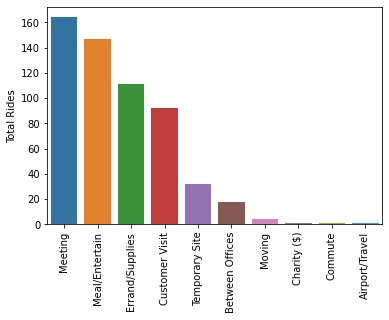

In [22]:
purpose_labels = uber_df.PURPOSE.value_counts().nlargest(10)
sns.barplot(x=purpose_labels.index, y=purpose_labels);
plt.ylabel('Total Rides');
plt.xticks(rotation=90);

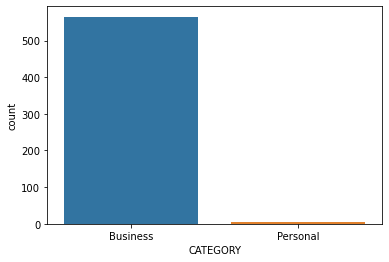

In [23]:
sns.countplot(x=uber_df['CATEGORY']);

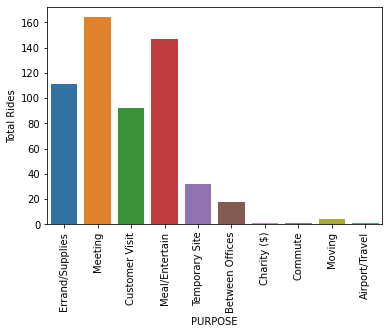

In [24]:
sns.countplot(x=uber_df['PURPOSE']);
plt.ylabel('Total Rides');
plt.xticks(rotation=90);

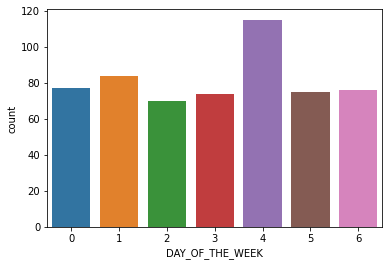

In [25]:
sns.countplot(x=uber_df['DAY_OF_THE_WEEK']);

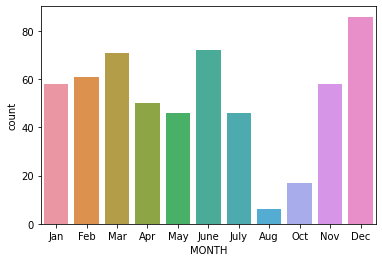

In [26]:
sns.countplot(x=uber_df['MONTH']);